In [44]:
a2=a.copy()

In [43]:
a1=a.copy()

In [2]:
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')


In [8]:
a["markalar"] = a["markalar"].replace({" 'Galaxy A11'": "Galaxy A11"," 'Galaxy A71'":"Galaxy A71"," 'Galaxy A31'":"Galaxy A31"," 'Galaxy A51'":"Galaxy A51"," 'Galaxy M31'":"Galaxy M31"," 'Galaxy M11'":"Galaxy M11"," 'Galaxt Note 10 Lite'":"Galaxt Note 10 Lite"})

In [3]:
a=pd.read_excel("sentiment.xlsx")

In [9]:
a

,markalar,yorumlar
0,Galaxy A11,['ürün fiyatına göre güzel birtek ön kamerasın...
1,Galaxy A71,['fiyatına göre mükemmel bir ürün hızlı teslim...
2,Galaxy A71,['urun güzel fakat camera performansı bekledig...
3,Galaxy A31,['Annem için aldım.Hem annem hem de ben çok be...
4,Galaxy A51,['İllaki daha iyi telefonlar vardır ama bu fiy...
...,...,...
825,Galaxy A11,['Ürünün hem fiyatı uygun gerçekten hemde çok ...
826,Galaxy M31,"['Ürün oldukça iyi, fiyatına göre piyasadaki e..."
827,Galaxy A71,['ekranı biraz büyük elime sığmıyor ama memmun...
828,Galaxy A71,['uygun fiyat zamanında teslimat.güzel paketle...


In [18]:
with pd.option_context("display.max_colwidth",None):
    display(a)

markalar  \
0             Galaxy A11   
1             Galaxy A71   
2             Galaxy A71   
3             Galaxy A31   
4             Galaxy A51   
..                   ...   
825           Galaxy A11   
826           Galaxy M31   
827           Galaxy A71   
828           Galaxy A71   
829  Galaxt Note 10 Lite   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [13]:
a["yorumlar"]=a.yorumlar.str[:4999]

In [16]:
a=a[a["yorumlar"].notnull()]

In [17]:
#noktalama işaretleri
a["yorumlar"] = a["yorumlar"].str.replace('[^\w\s]','')

#sayılar
a["yorumlar"]= a["yorumlar"].str.replace('\d','')

#stopwords
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')
a["yorumlar"]= a["yorumlar"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

#lemmi
from textblob import Word
#nltk.download('wordnet')
a["yorumlar"] = a["yorumlar"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

#buyuk-kucuk donusumu
a["yorumlar"]= a["yorumlar"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [19]:
from google_trans_new import google_translator
translator=google_translator()

In [21]:
a["yorumlar_en"]=a["yorumlar"].map(lambda x:translator.translate(x,lang_src="tr",lang_tgt="en"))

In [27]:
a

,markalar,yorumlar,yorumlar_en,sentiment
0,Galaxy A11,ürün fiyatına göre güzel birtek ön kamerasını ...,I did not like the front camera for the price ...,0.272188
1,Galaxy A71,fiyatına göre mükemmel bir ürün hızlı teslimat...,"Excellent product for its price, fast delivery...",0.332615
2,Galaxy A71,urun güzel fakat camera performansı bekledigim...,"The product is nice, but the camera performanc...",0.410026
3,Galaxy A31,annem için aldımhem annem hem de ben çok beğen...,"I bought it for my mother, both my mother and ...",0.316091
4,Galaxy A51,i̇llaki daha iyi telefonlar vardır ama bu fiya...,"There are better phones, but the best quality ...",0.457611
...,...,...,...,...
825,Galaxy A11,ürünün hem fiyatı uygun gerçekten hemde çok ka...,The price of the product was really affordable...,-0.116953
826,Galaxy M31,ürün oldukça iyi fiyatına göre piyasadaki en i...,The product is one of the best phones in the m...,0.122254
827,Galaxy A71,ekranı biraz büyük elime sığmıyor ama memmunum...,"The screen does not fit in my hand a bit big, ...",0.138789
828,Galaxy A71,uygun fiyat zamanında teslimatgüzel paketleme ...,reasonable price on time delivery nice packagi...,0.378107


In [23]:
with pd.option_context("display.max_colwidth",None):
    display(a)

markalar  \
0             Galaxy A11   
1             Galaxy A71   
2             Galaxy A71   
3             Galaxy A31   
4             Galaxy A51   
..                   ...   
825           Galaxy A11   
826           Galaxy M31   
827           Galaxy A71   
828           Galaxy A71   
829  Galaxt Note 10 Lite   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [24]:
from textblob import TextBlob

In [25]:
a["sentiment"]=a["yorumlar_en"].map(lambda x :TextBlob(x).sentiment.polarity)

In [26]:
a

,markalar,yorumlar,yorumlar_en,sentiment
0,Galaxy A11,ürün fiyatına göre güzel birtek ön kamerasını ...,I did not like the front camera for the price ...,0.272188
1,Galaxy A71,fiyatına göre mükemmel bir ürün hızlı teslimat...,"Excellent product for its price, fast delivery...",0.332615
2,Galaxy A71,urun güzel fakat camera performansı bekledigim...,"The product is nice, but the camera performanc...",0.410026
3,Galaxy A31,annem için aldımhem annem hem de ben çok beğen...,"I bought it for my mother, both my mother and ...",0.316091
4,Galaxy A51,i̇llaki daha iyi telefonlar vardır ama bu fiya...,"There are better phones, but the best quality ...",0.457611
...,...,...,...,...
825,Galaxy A11,ürünün hem fiyatı uygun gerçekten hemde çok ka...,The price of the product was really affordable...,-0.116953
826,Galaxy M31,ürün oldukça iyi fiyatına göre piyasadaki en i...,The product is one of the best phones in the m...,0.122254
827,Galaxy A71,ekranı biraz büyük elime sığmıyor ama memmunum...,"The screen does not fit in my hand a bit big, ...",0.138789
828,Galaxy A71,uygun fiyat zamanında teslimatgüzel paketleme ...,reasonable price on time delivery nice packagi...,0.378107


In [31]:
for i in a["sentiment"]:
    if i <0:
        a["sentiment"].replace(to_replace=i,value="Negatif",inplace=True)
    elif i>0:
        a["sentiment"].replace(to_replace=i,value="Pozitif",inplace=True)
    else:
        a["sentiment"].replace(to_replace=i,value="Nötr",inplace=True)

In [35]:
a.head(20)

,markalar,yorumlar,yorumlar_en,sentiment
0,Galaxy A11,ürün fiyatına göre güzel birtek ön kamerasını ...,I did not like the front camera for the price ...,Pozitif
1,Galaxy A71,fiyatına göre mükemmel bir ürün hızlı teslimat...,"Excellent product for its price, fast delivery...",Pozitif
2,Galaxy A71,urun güzel fakat camera performansı bekledigim...,"The product is nice, but the camera performanc...",Pozitif
3,Galaxy A31,annem için aldımhem annem hem de ben çok beğen...,"I bought it for my mother, both my mother and ...",Pozitif
4,Galaxy A51,i̇llaki daha iyi telefonlar vardır ama bu fiya...,"There are better phones, but the best quality ...",Pozitif
5,Galaxy A71,kamerasi icin aldim cok güzel buyuk ekran seve...,camera on the aldim very nice large screen rel...,Pozitif
6,Galaxy A51,eşim için aldık çok begendi fakat kadar kamera...,"We bought it for my wife, it was very like, bu...",Pozitif
7,Galaxy A31,bildiğimiz samsung kalitesi kamerası güzel kas...,Samsung quality camera as we know it is not ni...,Pozitif
8,Galaxy A71,telefon bugün geldi rengi falan gayet güzel ye...,"The phone has arrived today, the color or some...",Pozitif
9,Galaxy A51,mağazadan çok çok daha uygun fiyata aldım tren...,I bought it at a much more affordable price fr...,Pozitif


In [36]:
a["sentiment"].value_counts()

Pozitif    584
Negatif    242
Nötr         3
Name: sentiment, dtype: int64

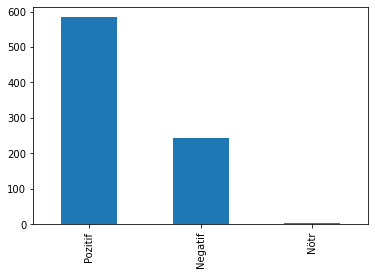

In [37]:
a["sentiment"].value_counts().plot(kind="bar")

In [38]:
a.groupby(["markalar","sentiment"])[["sentiment"]].count()

sentiment
markalar            sentiment           
Galaxt Note 10 Lite Negatif           13
                    Pozitif           34
Galaxy A11          Negatif           32
                    Pozitif           60
Galaxy A31          Negatif           38
                    Pozitif           91
Galaxy A51          Negatif           34
                    Pozitif           95
Galaxy A71          Negatif           70
                    Nötr               2
                    Pozitif          186
Galaxy M11          Negatif           30
                    Nötr               1
                    Pozitif           59
Galaxy M31          Negatif           25
                    Pozitif           59

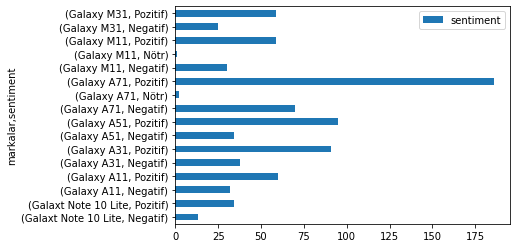

In [42]:
a.groupby(["markalar","sentiment"])[["sentiment"]].count().plot.barh()

In [39]:
pd.crosstab(a["markalar"],a["sentiment"]).apply(lambda r:r/r.sum(),axis=1)

sentiment,Negatif,Nötr,Pozitif
markalar,,,
Galaxt Note 10 Lite,0.276596,0.000000,0.723404
Galaxy A11,0.347826,0.000000,0.652174
Galaxy A31,0.294574,0.000000,0.705426
Galaxy A51,0.263566,0.000000,0.736434
Galaxy A71,0.271318,0.007752,0.720930
Galaxy M11,0.333333,0.011111,0.655556
Galaxy M31,0.297619,0.000000,0.702381
